# Here we can see that with zero weight initialization all models are performing terrible because zero weight initialization is causing  no change in gradient values which is why model is not working

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [ ]:
X,y = make_moons(n_samples=100,noise=0.2,random_state=42)

In [ ]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
df = pd.DataFrame(X)

In [ ]:
df['target'] = y

In [ ]:
df.head()

,0,1,target
0,1.645654,-0.536487,1
1,0.113649,0.569574,1
2,0.757790,-0.339259,1
3,-1.146562,0.231257,0
4,-0.655267,0.090329,0


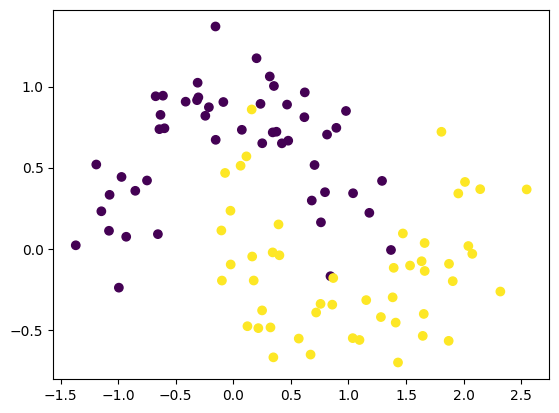

In [ ]:
plt.scatter(df[0],df[1],c=df['target'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set parameters to 0
model.get_weights()

[array([[ 0.05453146, -0.08293271,  0.21400046, -0.0119589 , -0.38252884,
         -0.6039814 , -0.05113018,  0.19826835,  0.10297269,  0.0491358 ],
        [-0.58724874,  0.3900563 , -0.53847605,  0.06659353, -0.05860198,
         -0.28666127,  0.38918418,  0.02999777, -0.48417962,  0.12503874]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.26680213],
        [ 0.6856912 ],
        [-0.47562256],
        [-0.12049431],
        [ 0.63225824],
        [ 0.37194473],
        [ 0.3598376 ],
        [-0.27279904],
        [ 0.48244017],
        [ 0.46441382]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.5281 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6948
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5281 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss: 0.6957
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4930 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6963
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5203 - loss: 0.6926 - val_accuracy: 0.4000 - val_loss: 0.6971
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5242 - loss: 0.6923 - val_accuracy: 0.4000 - val_loss: 0.6978
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4969 - loss: 0.6934 - val_accuracy: 0.4000 - val_loss: 0.6982
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5359 - loss: 0.6915 - val_accuracy: 0.4000 - val_loss: 0.6989
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss

In [ ]:
model.get_weights()

[array([[-0.4110299 , -0.4110299 , -0.4110299 , -0.4110299 , -0.4110299 ,
         -0.4110299 , -0.4110299 , -0.4110299 , -0.4110299 , -0.4110299 ],
        [ 0.41291794,  0.41291794,  0.41291794,  0.41291794,  0.41291794,
          0.41291794,  0.41291794,  0.41291794,  0.41291794,  0.41291794]],
       dtype=float32),
 array([-0.07887005, -0.07887005, -0.07887005, -0.07887005, -0.07887005,
        -0.07887005, -0.07887005, -0.07887005, -0.07887005, -0.07887005],
       dtype=float32),
 array([[-0.08007319],
        [-0.08007319],
        [-0.08007319],
        [-0.08007319],
        [-0.08007319],
        [-0.08007319],
        [-0.08007319],
        [-0.08007319],
        [-0.08007319],
        [-0.08007319]], dtype=float32),
 array([0.051308], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

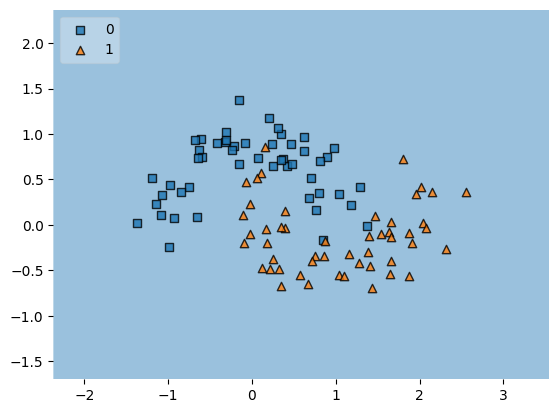

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Problem with Tanh

In [ ]:
model1 = Sequential()

model1.add(Dense(10,activation='tanh',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.get_weights()

[array([[-0.30447456,  0.14618516, -0.595113  , -0.0342927 , -0.6131264 ,
         -0.3971108 ,  0.1459955 ,  0.39507562, -0.65495   , -0.6161082 ],
        [-0.53420573,  0.4816112 , -0.54454434, -0.20421326, -0.01681626,
         -0.38846043, -0.1174385 , -0.4732592 , -0.6116907 , -0.70683247]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.19075543],
        [-0.55997956],
        [-0.58731234],
        [-0.23845619],
        [ 0.04911417],
        [ 0.16991681],
        [-0.6033789 ],
        [-0.55736625],
        [-0.25028092],
        [-0.50934386]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights1 = model1.get_weights()

In [ ]:
initial_weights1[0] = np.zeros(model1.get_weights()[0].shape)
initial_weights1[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights1[2] = np.zeros(model1.get_weights()[2].shape)
initial_weights1[3] = np.zeros(model1.get_weights()[3].shape)

In [ ]:
model1.set_weights(initial_weights1)

In [ ]:
model1.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.5555 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6933
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5477 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5203 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5359 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4930 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5398 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5398 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5164 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss

In [ ]:
model1.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.06479896], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

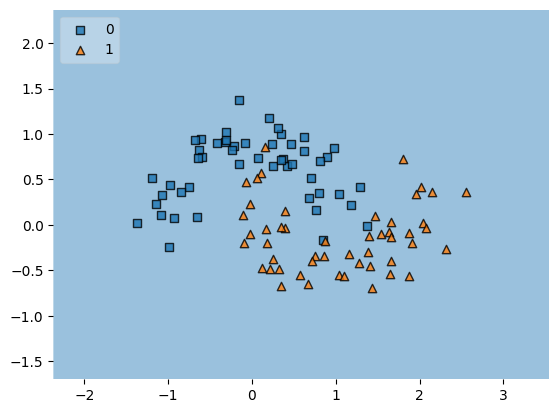

In [ ]:
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

# Problem with Relu

In [ ]:
model2 = Sequential()

model2.add(Dense(10,activation='relu',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.get_weights()

[array([[-0.04196578,  0.6557161 ,  0.6371084 ,  0.27325654, -0.36657256,
          0.05965465, -0.30559313,  0.4510309 ,  0.5296002 , -0.25789133],
        [-0.31627333,  0.5991619 , -0.6199137 , -0.04310912, -0.2735366 ,
         -0.43039316,  0.3786953 ,  0.33664626,  0.23720008, -0.29802203]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.7027456 ],
        [-0.68332994],
        [-0.24955088],
        [-0.60129166],
        [-0.6103941 ],
        [ 0.41498142],
        [ 0.60249656],
        [-0.02760607],
        [-0.19762361],
        [-0.19645774]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights2 = model2.get_weights()

In [ ]:
initial_weights2[0] = np.zeros(model2.get_weights()[0].shape)
initial_weights2[1] = np.zeros(model2.get_weights()[1].shape)
initial_weights2[2] = np.zeros(model2.get_weights()[2].shape)
initial_weights2[3] = np.zeros(model2.get_weights()[3].shape)

In [ ]:
model2.set_weights(initial_weights2)

In [ ]:
model2.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5281 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6933
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5281 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5594 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5164 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5594 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6937
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5359 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5437 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5008 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss

In [ ]:
model2.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.05936952], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

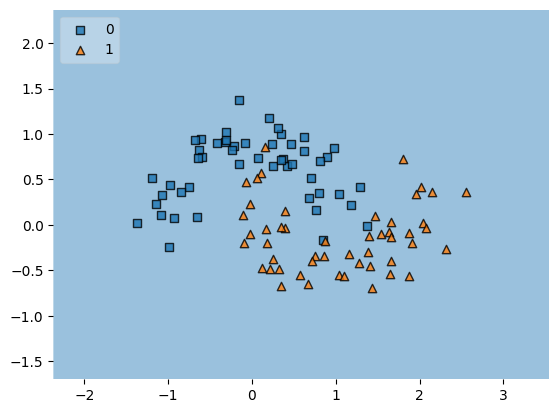

In [ ]:
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)